In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import re

In [3]:
#podLevelDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneDataRoles.jsonl", orient="records", lines=True) 
podLevelDf = pd.read_feather("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneDataRoles.feather") 

In [3]:
prosoDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/accomodation/conversationsGroupedClean.jsonl", orient="records", lines=True)

In [4]:
#now plot 
#fig,ax = plt.subplots(figsize=(5, 3.5))
#sns.barplot(data=pitchDf ,x="list", y="category1", ax=ax) 
prosoDf.shape

(40108, 31)

In [5]:
def confInt(inList): 
    mean = np.mean(inList)
    std = np.std(inList)
    print(std/np.sqrt(len(inList)))
    dof = len(inList) - 1
    tVal = np.abs(t.ppf(.05/2, dof))
    halfInt = tVal*(std/np.sqrt(len(inList)))
    return [mean-halfInt, mean+halfInt]



(40108, 31)


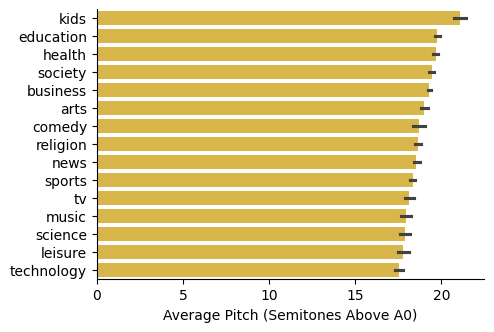

In [114]:
topCats = list(pd.DataFrame(prosoDf.drop_duplicates(subset="potentialOutPath")["category1"].value_counts()).index)


print(prosoDf.shape)

pitchDf = prosoDf.loc[prosoDf["category1"].isin(topCats[:15]), ["F0semitoneFrom27.5Hz_sma3nz", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
pitchDf = pitchDf[pitchDf["len"] >= 250]

#get bar ordering 
order = pitchDf.sort_values("mean", ascending=False).index.values
pitchDf = pitchDf.explode("list").reset_index()

#now plot 
fig,ax = plt.subplots(figsize=(5, 3.5))
sns.barplot(data=pitchDf ,x="list", y="category1", order=order, ax=ax, color="#f1c232", rasterized=True) 
#fig.suptitle("Categories Ordered by Average Pitch")
ax.set_xlabel("Average Pitch (Semitones Above A0)")
ax.set_ylabel(None)
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgCategoryPitches.png", bbox_inches="tight", dpi=600) 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgCategoryPitches.pdf", bbox_inches="tight", dpi=800) 


(40108, 31)


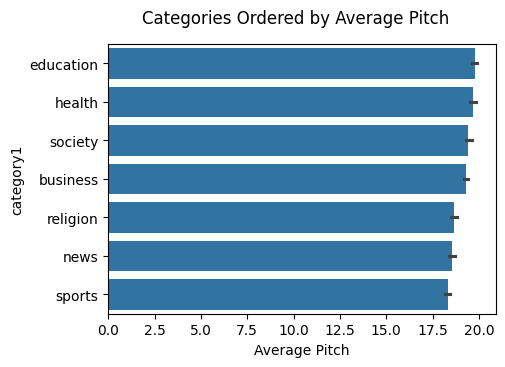

In [81]:
print(prosoDf.shape)
pitchDf = prosoDf[prosoDf["category1"].isin(topCats[:7])]
pitchDf = pitchDf[["F0semitoneFrom27.5Hz_sma3nz", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
pitchDf = pitchDf[pitchDf["len"] >= 300]


#get bar ordering 
order = pitchDf.sort_values("mean", ascending=False).index.values
pitchDf = pitchDf.explode("list").reset_index()

#now plot 
fig,ax = plt.subplots(figsize=(5, 3.5))
sns.barplot(data=pitchDf ,x="list", y="category1", order=order, ax=ax) 
fig.suptitle("Categories Ordered by Average Pitch")
ax.set_xlabel("Average Pitch")

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgCategoryPitches.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgCategoryPitches.pdf", bbox_inches="tight", dpi=800) 


(40108, 31)


/tmp/ipykernel_768883/3900072249.py:3: FutureWarning: The provided callable <function mean at 0x7fbe85ec7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pitchDf = prosoDf[["F0semitoneFrom27.5Hz_sma3nz", "category2"]].groupby(["category2"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)


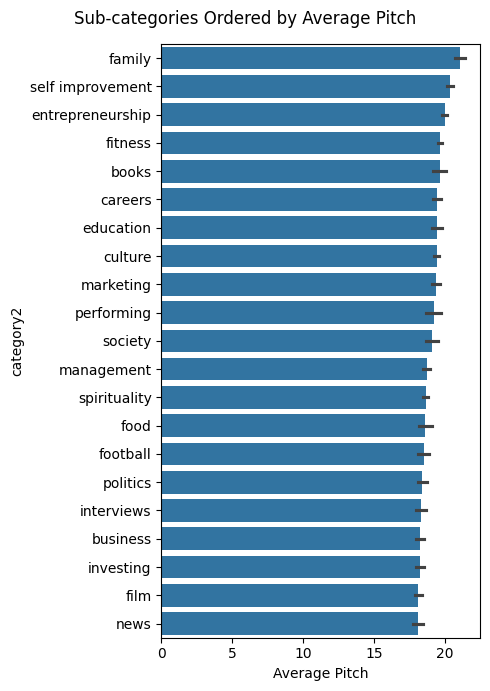

In [9]:
print(prosoDf.shape)
#pitchDf = prosoDf[["F0semitoneFrom27.5Hz_sma3nz", "category1"]].groupby(["category1"]).agg(["mean", len]).droplevel(level=0, axis=1).sort_values("mean").reset_index()
pitchDf = prosoDf[["F0semitoneFrom27.5Hz_sma3nz", "category2"]].groupby(["category2"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
pitchDf = pitchDf[pitchDf["len"] >= 300]

#get bar ordering 
order = pitchDf.sort_values("mean", ascending=False).index.values
pitchDf = pitchDf.explode("list").reset_index()

#now plot 
fig,ax = plt.subplots(figsize=(5, 7))
sns.barplot(data=pitchDf ,x="list", y="category2", order=order, ax=ax) 
fig.suptitle("Sub-categories Ordered by Average Pitch")
ax.set_xlabel("Average Pitch")
plt.tight_layout()

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgSubcategoryPitches.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgSubcategoryPitches.pdf", bbox_inches="tight", dpi=800) 

(40108, 31)


/tmp/ipykernel_768883/1848119684.py:3: FutureWarning: The provided callable <function mean at 0x7fbe85ec7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pitchDf = prosoDf[["speakingRate", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)


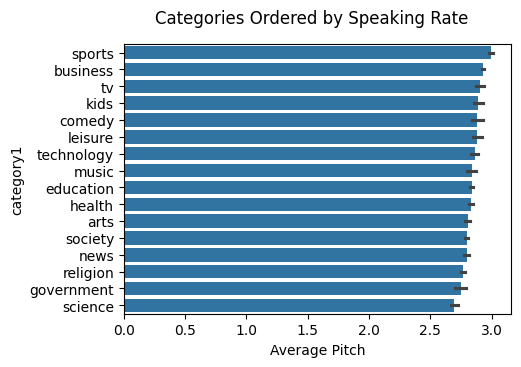

In [10]:
#how does speaking rate differ by category? 
print(prosoDf.shape)
pitchDf = prosoDf[["speakingRate", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
pitchDf = pitchDf[pitchDf["len"] >= 300]

#get bar ordering 
order = pitchDf.sort_values("mean", ascending=False).index.values
pitchDf = pitchDf.explode("list").reset_index()

#now plot 
fig,ax = plt.subplots(figsize=(5, 3.5))
sns.barplot(data=pitchDf ,x="list", y="category1", order=order, ax=ax) 
fig.suptitle("Categories Ordered by Speaking Rate")
ax.set_xlabel("Average Pitch")

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgCategorySR.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgCategorySR.pdf", bbox_inches="tight", dpi=800) 

(40108, 31)


/tmp/ipykernel_768883/3597289195.py:3: FutureWarning: The provided callable <function mean at 0x7fbe85ec7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pitchDf = prosoDf[["speakingRate", "category2"]].groupby(["category2"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)


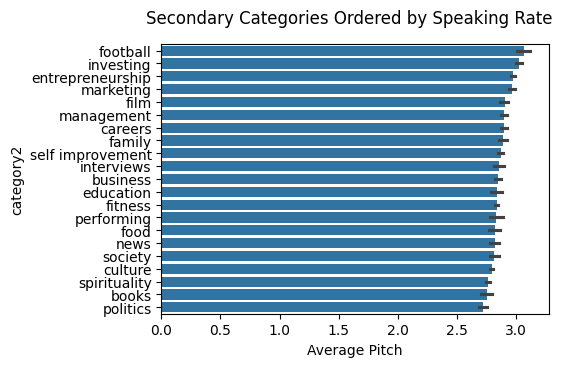

In [11]:

#how does speaking rate differ by category? 
print(prosoDf.shape)
pitchDf = prosoDf[["speakingRate", "category2"]].groupby(["category2"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
pitchDf = pitchDf[pitchDf["len"] >= 300]

#get bar ordering 
order = pitchDf.sort_values("mean", ascending=False).index.values
pitchDf = pitchDf.explode("list").reset_index()

#now plot 
fig,ax = plt.subplots(figsize=(5, 3.5))
sns.barplot(data=pitchDf ,x="list", y="category2", order=order, ax=ax) 
fig.suptitle("Secondary Categories Ordered by Speaking Rate")
ax.set_xlabel("Average Pitch")

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgSubcategorySR.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgSubcategorySR.pdf", bbox_inches="tight", dpi=800) 

(40108, 31)


/tmp/ipykernel_768883/2281051817.py:5: FutureWarning: The provided callable <function mean at 0x7fbe85ec7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sNumDf = prosoDf[["numSpeakers", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)


Text(0.5, 0, 'Average Speaker Number')

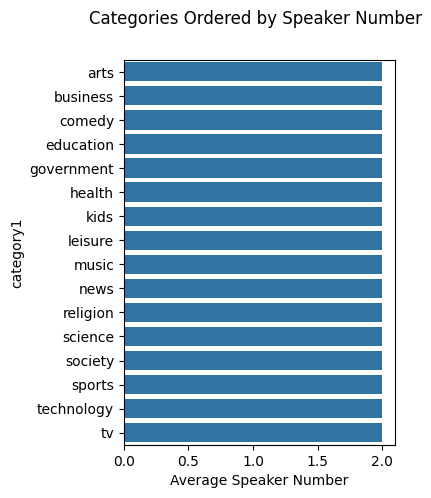

In [13]:
#how does speaker count differ across categories? 
#prosoDf[["numSpeakers", "category1"]]
print(prosoDf.shape)
sNumDf = prosoDf.drop_duplicates("potentialOutPath")
sNumDf = prosoDf[["numSpeakers", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
sNumDf = sNumDf[sNumDf["len"] >= 300]

#get bar ordering 
order = sNumDf.sort_values("mean", ascending=False).index.values
sNumDf = sNumDf.explode("list").reset_index()

fig,ax = plt.subplots(figsize=(3.5, 5))
sns.barplot(data=sNumDf ,x="list", y="category1", order=order, ax=ax) 
fig.suptitle("Categories Ordered by Speaker Number")
ax.set_xlabel("Average Speaker Number")

#plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgSategorySN.pdf", bbox_inches="tight") 
#plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/avgSategorySN.pdf", bbox_inches="tight", dpi=800) 

(40108, 31)


/tmp/ipykernel_768883/3009785996.py:3: FutureWarning: The provided callable <function mean at 0x7fbe85ec7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sNumDf = sNumDf[["numSpeakers", "category2"]].groupby(["category2"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)


Text(0.5, 0, 'Average Speaker Number')

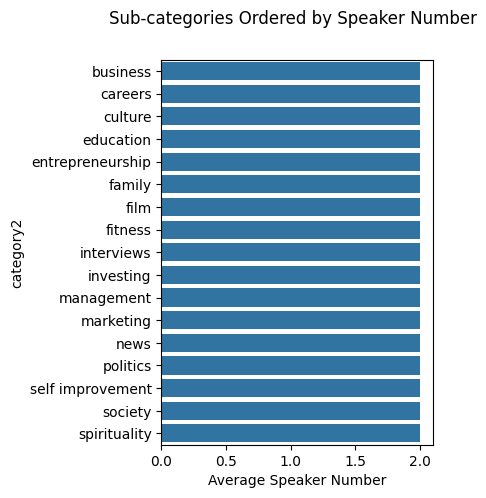

In [14]:
print(prosoDf.shape)
sNumDf = prosoDf.drop_duplicates("potentialOutPath")
sNumDf = sNumDf[["numSpeakers", "category2"]].groupby(["category2"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
sNumDf = sNumDf[sNumDf["len"] >= 200]

#get bar ordering 
order = sNumDf.sort_values("mean", ascending=False).index.values
sNumDf = sNumDf.explode("list").reset_index()

fig,ax = plt.subplots(figsize=(3.5, 5))
sns.barplot(data=sNumDf ,x="list", y="category2", order=order, ax=ax) 
fig.suptitle("Sub-categories Ordered by Speaker Number")
ax.set_xlabel("Average Speaker Number")

In [98]:
#how does pitch relate to amount of speaking time? 
prosoDf["pitchBins"] = pd.cut(prosoDf["F0semitoneFrom27.5Hz_sma3nz"], 8)

/tmp/ipykernel_768883/632583590.py:5: FutureWarning: The provided callable <function mean at 0x7fbe85ec7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hgDf = hgDf[["uniqueGuests", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)


<Axes: xlabel='list', ylabel='category1'>

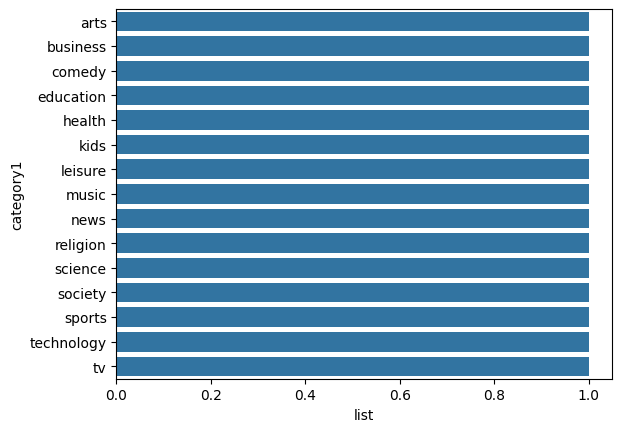

In [15]:
#what is the host-to-guest ratio? 
#hgDf = prosoDf.drop_duplicates("potentialOutPath") #.dropna(subset=["guestPredictedNames"], how="all")
hgDf = prosoDf
hgDf = hgDf.drop_duplicates("potentialOutPath")
hgDf = hgDf[["uniqueGuests", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
hgDf = hgDf[hgDf["len"] >= 200]

#get bar ordering 
order = hgDf.sort_values("mean", ascending=False).index.values
hgDf = hgDf.explode("list").reset_index()

sns.barplot(data=hgDf, x="list", y="category1", order=order)

/tmp/ipykernel_768883/108411809.py:5: FutureWarning: The provided callable <function mean at 0x7fbe85ec7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hgDf = hgDf[["uniqueHosts", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)


<Axes: xlabel='list', ylabel='category1'>

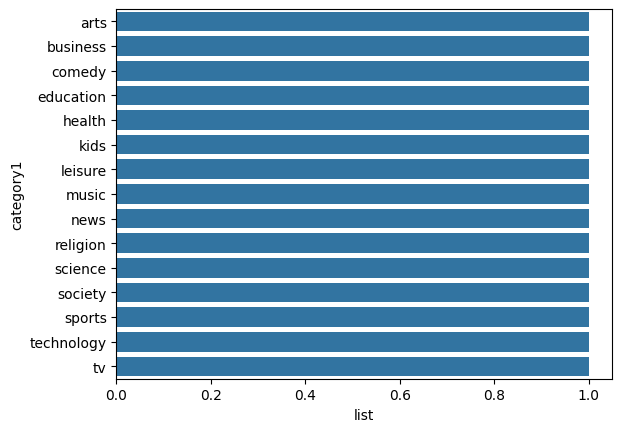

In [22]:

#what is the host-to-guest ratio? 
hgDf = prosoDf.drop_duplicates("potentialOutPath").dropna(subset=["hostPredictedNames"], how="all")

hgDf = hgDf.drop_duplicates("potentialOutPath")
hgDf = hgDf[["uniqueHosts", "category1"]].groupby(["category1"]).agg([len, np.mean, list]).droplevel(level=0, axis=1)
hgDf = hgDf[hgDf["len"] >= 200]

#get bar ordering 
order = hgDf.sort_values("mean", ascending=False).index.values
hgDf = hgDf.explode("list").reset_index()

sns.barplot(data=hgDf, x="list", y="category1", order=order)

In [19]:
prosoDf["predictedHost"] = prosoDf["saidHost"] == prosoDf["firstSpeaker"]

/tmp/ipykernel_768883/880498246.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["Guest", "Host"])


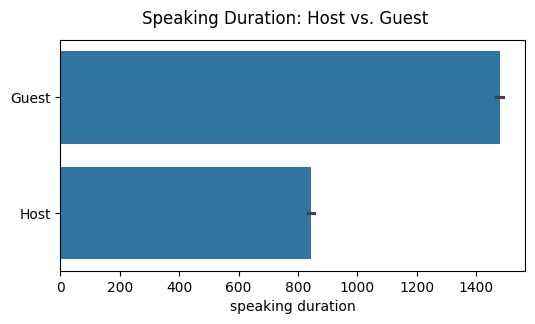

In [23]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(data=prosoDf, x="speakerDuration", y="predictedHost", orient="h", ax=ax)
ax.set_xlabel("speaking duration")
ax.set_yticklabels(["Guest", "Host"])
ax.set_ylabel(None)
fig.suptitle("Speaking Duration: Host vs. Guest")

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/HostGuestDurations.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/prosodyFigures/HostGuestDurations.pdf", bbox_inches="tight", dpi=800) 

In [24]:
prosoDf["F0semitoneFrom27.5Hz_sma3nz"] - prosoDf[""]

,rssUrl,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,firstSpeaker,content,speakerDuration,...,category2,duration,parsedDuration,hostPredictedNames,guestPredictedNames,neitherPredictedNames,uniqueHosts,uniqueGuests,numSpeakers,predictedHost
0,Http://feeds.feedburner.com/ipadpros,27.901263,-0.014201,16.728971,6.286672,12.051957,616.782411,SPEAKER_00,>> It gives users/me in support emails the ab...,2164.26,...,how to,49:20,2960.0,[Tim Chen],[Charlie Chapman],None,1,1,2,False
1,Http://feeds.feedburner.com/ipadpros,23.176142,3.541121,22.997712,4.679373,16.594127,664.831552,SPEAKER_01,"] Welcome to iPad Pros, the show all about usi...",762.68,...,how to,49:20,2960.0,[Tim Chen],[Charlie Chapman],None,1,1,2,True
2,http://10minutejazzlesson.com/feed/podcast/,21.827629,4.515198,19.068418,0.291235,13.682647,622.946269,SPEAKER_00,10-minute Jaws lesson podcast episode 211. ev...,611.57,...,performing,13:32,812.0,[Nick Manella],[Barbara Roy],[Jerome Kern],1,1,2,True
3,http://10minutejazzlesson.com/feed/podcast/,31.332377,7.001761,11.724613,3.955529,21.357926,691.677618,SPEAKER_01,first course. SoMusicMusic] [Music]Music] [Mu...,148.84,...,performing,13:32,812.0,[Nick Manella],[Barbara Roy],[Jerome Kern],1,1,2,False
4,http://adilamarsi.audello.com/podcast/1/,22.108283,-2.564043,4.401881,-5.655452,23.683144,688.546755,SPEAKER_00,Hello thank you so much for having me I am su...,1431.98,...,management,47:16,2836.0,[Adele Marci],[Leslie Naughton],None,1,1,2,False


In [33]:
prosoDf["saidHost"]

0        SPEAKER_01
1        SPEAKER_01
2        SPEAKER_00
3        SPEAKER_00
4        SPEAKER_02
            ...    
40103    SPEAKER_00
40104    SPEAKER_00
40105    SPEAKER_00
40106    SPEAKER_01
40107    SPEAKER_01
Name: saidHost, Length: 40108, dtype: object

In [49]:
#what are the top cats that we care about? 
topCats = list(pd.DataFrame(prosoDf.drop_duplicates(subset="potentialOutPath")["category1"].value_counts()).index)

In [50]:
topCats

['business',
 'education',
 'health',
 'sports',
 'society',
 'religion',
 'news',
 'arts',
 'technology',
 'tv',
 'science',
 'music',
 'leisure',
 'comedy',
 'kids',
 'government',
 'history',
 'fiction',
 'true crime',
 'games',
 'natural']

Text(0.5, 1.0, 'Host and Guest Speaker Duration by Category (Orange is Host)')

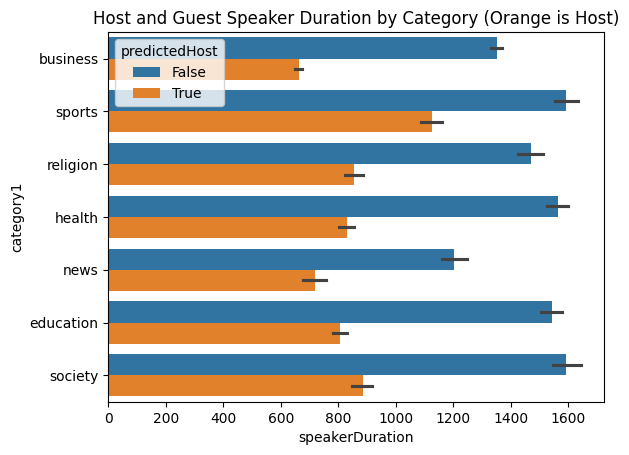

In [54]:
sns.barplot(prosoDf[prosoDf["category1"].isin(topCats[:7])], x="speakerDuration", y="category1", hue="predictedHost")
plt.title("Host and Guest Speaker Duration by Category (Orange is Host)")


In [86]:
#let's flatten the dataframe so we can actually compare within conversations 
targetCols = ["firstSpeaker", "saidHost", "F0semitoneFrom27.5Hz_sma3nz", "speakerDuration"]
hostDf = prosoDf.loc[prosoDf["predictedHost"] == True, ["potentialOutPath", "firstSpeaker", "saidHost", "speakerDuration", "F0semitoneFrom27.5Hz_sma3nz", "category1"]]
guestDf = prosoDf.loc[prosoDf["predictedHost"] == False, ["potentialOutPath", "firstSpeaker", "saidHost", "speakerDuration", "F0semitoneFrom27.5Hz_sma3nz"]]

hostDf = hostDf.rename(columns={colname:colname + "_host" for colname in targetCols})
guestDf = guestDf.rename(columns={colname:colname + "_guest" for colname in targetCols})

flatDf = pd.merge(hostDf, guestDf, on="potentialOutPath", how="inner")

In [87]:
flatDf.columns

Index(['potentialOutPath', 'firstSpeaker_host', 'saidHost_host',
       'speakerDuration_host', 'F0semitoneFrom27.5Hz_sma3nz_host', 'category1',
       'firstSpeaker_guest', 'saidHost_guest', 'speakerDuration_guest',
       'F0semitoneFrom27.5Hz_sma3nz_guest'],
      dtype='object')

Text(0.5, 0, 'Average Pitch Difference (Semitones)')

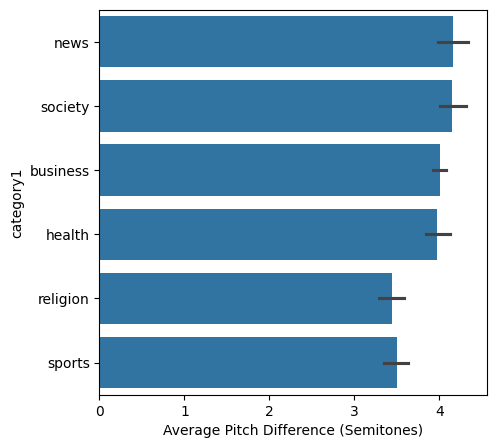

In [76]:
flatDf["pitchDiff"] = np.abs(flatDf["F0semitoneFrom27.5Hz_sma3nz_host"] - flatDf["F0semitoneFrom27.5Hz_sma3nz_guest"]) 
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(flatDf[flatDf["category1"].isin(topCats[:7])], x="pitchDiff", y="category1", order=["news", "society", "business", "health", "religion", "sports"], ax=ax)
ax.set_xlabel("Average Pitch Difference (Semitones)")

Text(0.5, 0, 'Average of Guest - Host Duration for Different Categories')

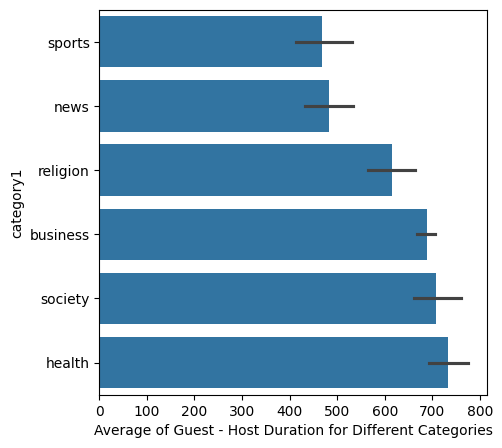

In [102]:
flatDf["durationDiff"] = flatDf["speakerDuration_guest"] - flatDf["speakerDuration_host"]
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(flatDf[flatDf["category1"].isin(topCats[:7])], x="durationDiff", y="category1", order=["sports", "news", "religion", "business", "society", "health"], ax=ax)
ax.set_xlabel("Average of Guest - Host Duration for Different Categories")

Text(0.5, 0, 'Average of Guest - Host Duration for Different Categories')

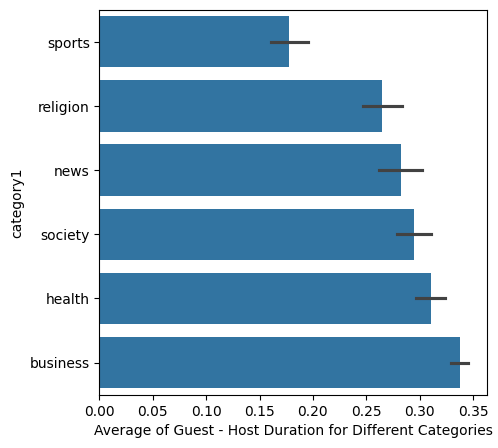

In [97]:
flatDf["durationDiffProp"] = (flatDf["speakerDuration_guest"] - flatDf["speakerDuration_host"]) / (flatDf["speakerDuration_guest"] + flatDf["speakerDuration_host"])
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(flatDf[flatDf["category1"].isin(topCats[:7])], x="durationDiffProp", y="category1", order=["sports", "religion", "news", "society", "health", "business"], ax=ax)
ax.set_xlabel("Average of Guest - Host Duration for Different Categories")